In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your file on Google Drive
file_path = "/content/drive/My Drive/merged_tensors_with_labels.csv"

# Copy the file to Colab under the /content directory
!cp "{file_path}" /content

# Load the CSV file into a DataFrame
import pandas as pd
df = pd.read_csv("/content/merged_tensors_with_labels.csv")

# Display the DataFrame
print(df.head())

Mounted at /content/drive
          0         1         2         3         4         5         6  \
0 -0.788955 -0.452171 -0.718902  0.524362  0.407345 -0.054561  0.599061   
1 -0.786391 -0.536763 -0.928366  0.635211  0.677996 -0.164220  0.391323   
2 -0.760979 -0.356124 -0.678704  0.650039  0.453287 -0.208375  0.471421   
3 -0.645143 -0.442135 -0.855603  0.572795  0.629087 -0.262791  0.218573   
4 -0.715979 -0.244338 -0.451217  0.467052  0.265069 -0.223246 -0.013612   

          7         8         9  ...       759       760       761       762  \
0  0.322636 -0.314898 -0.999944  ...  0.029673  0.846054  0.820441  0.263943   
1  0.416578 -0.727519 -0.999947  ... -0.129403  0.900940  0.696012  0.549645   
2  0.159647 -0.395316 -0.999743  ...  0.439547  0.853939  0.784838  0.883011   
3  0.249878 -0.622201 -0.999599  ...  0.541194  0.944661  0.662793  0.681176   
4  0.125522 -0.200415 -0.999057  ...  0.191682  0.713078  0.695555  0.938667   

        763       764       765       766 

RANDOM FOREST

1. Data Preparation

In [ ]:
# Separate features and target label
X = df.drop(columns=['is_depression'])  # Features (768 columns)
y = df['is_depression']  # Target (depression label)

# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Model Initialization and Training

In [ ]:
# Initialize the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

3. Predictions and Evaluation

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

Accuracy: 88.95%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       783
           1       0.93      0.84      0.88       764

    accuracy                           0.89      1547
   macro avg       0.89      0.89      0.89      1547
weighted avg       0.89      0.89      0.89      1547


Confusion Matrix:
 [[736  47]
 [124 640]]


4. Feature Importances

In [ ]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to view the importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("\nTop 10 Important Features:\n", feature_importance_df.head(10))


Top 10 Important Features:
     Feature  Importance
558     558    0.028102
230     230    0.025678
696     696    0.019521
256     256    0.018684
435     435    0.018334
484     484    0.016442
19       19    0.012514
379     379    0.012231
246     246    0.012140
188     188    0.012000


5. Cross-Validation

In [ ]:
# Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation
print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.2f}")

6. ROC Curve and AUC

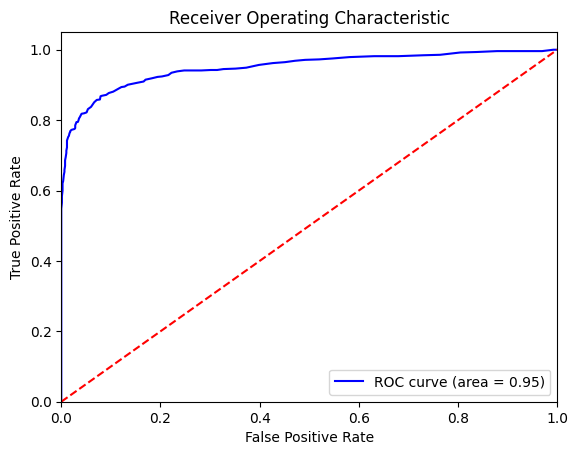

In [ ]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

7. Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

8. Misclassified Instances

In [ ]:
# Identify misclassified instances
misclassified = X_test[y_test != y_pred]
print("Misclassified Instances:\n", misclassified)

Misclassified Instances:
              0         1         2         3         4         5         6  \
3065 -0.718265 -0.118174  0.443466  0.526673 -0.350197 -0.043913  0.778827   
1412 -0.870063 -0.234679  0.025217  0.658469  0.163337 -0.104338  0.756771   
2821 -0.807038 -0.443402 -0.899155  0.750014  0.499383 -0.087614  0.708433   
683  -0.823983 -0.324437 -0.375674  0.596538  0.190574 -0.202110  0.571842   
3473 -0.800168 -0.477896 -0.946022  0.819783  0.666622 -0.144057  0.781667   
...        ...       ...       ...       ...       ...       ...       ...   
1219 -0.909966 -0.536592 -0.797106  0.806368  0.571506 -0.206146  0.903324   
3733 -0.765917 -0.368289 -0.684612  0.676944  0.504779 -0.097895  0.722571   
4945 -0.735585 -0.409706 -0.891968  0.556432  0.813494 -0.256121  0.492281   
1446 -0.810202 -0.410978 -0.835352  0.629704  0.697322 -0.026254  0.773321   
2542 -0.831498 -0.479612 -0.909301  0.705529  0.643445 -0.268341  0.655054   

             7         8         9  .

9. Model Saving

In [ ]:
# Save the model
import joblib
joblib.dump(rf_classifier, '/content/random_forest_model.pkl')

# Load the model later (uncomment the next line to load)
# loaded_model = joblib.load('/content/random_forest_model.pkl')

['/content/random_forest_model.pkl']

10. SHAP Values for Model Interpretability

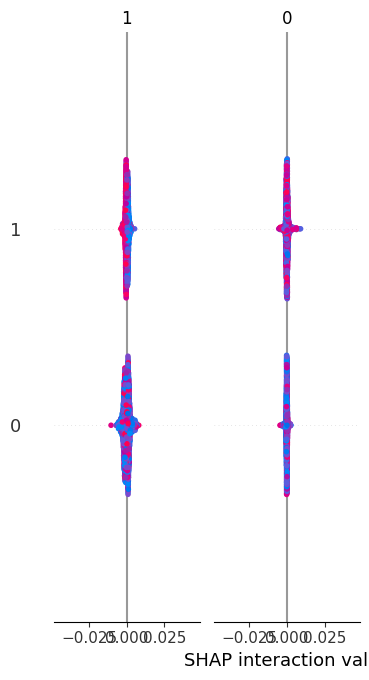

In [ ]:
# SHAP Values for model interpretability
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.initjs()
shap.summary_plot(shap_values, X_test)

Support Vector Machine (SVM)

1. Data Preparation

In [ ]:
# Separate features and target label
X = df.drop(columns=['is_depression'])  # Features (768 columns)
y = df['is_depression']  # Target (depression label)

# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Model Initialization and Training

In [ ]:
# Initialize the Support Vector Classifier
from sklearn.svm import SVC
svm_classifier = SVC(probability=True, random_state=42)  # probability=True for ROC curve

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(probability=True, random_state=42)

3. Predictions and Evaluation

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

Accuracy: 91.47%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       783
           1       0.97      0.86      0.91       764

    accuracy                           0.91      1547
   macro avg       0.92      0.91      0.91      1547
weighted avg       0.92      0.91      0.91      1547


Confusion Matrix:
 [[760  23]
 [109 655]]


4. Cross-Validation

In [ ]:
# Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_classifier, X, y, cv=5)  # 5-fold cross-validation
print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.95022624 0.95213454 0.94243208 0.89586028 0.70375162]
Mean CV Score: 0.89


5. ROC Curve and AUC

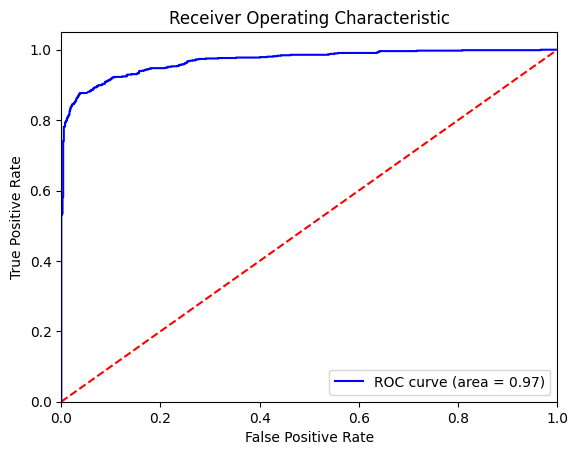

In [ ]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = svm_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

6. Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

7. Misclassified Instances

In [ ]:
# Identify misclassified instances
misclassified = X_test[y_test != y_pred]
print("Misclassified Instances:\n", misclassified)

Misclassified Instances:
              0         1         2         3         4         5         6  \
3065 -0.718265 -0.118174  0.443466  0.526673 -0.350197 -0.043913  0.778827   
1412 -0.870063 -0.234679  0.025217  0.658469  0.163337 -0.104338  0.756771   
2821 -0.807038 -0.443402 -0.899155  0.750014  0.499383 -0.087614  0.708433   
683  -0.823983 -0.324437 -0.375674  0.596538  0.190574 -0.202110  0.571842   
3473 -0.800168 -0.477896 -0.946022  0.819783  0.666622 -0.144057  0.781667   
...        ...       ...       ...       ...       ...       ...       ...   
1219 -0.909966 -0.536592 -0.797106  0.806368  0.571506 -0.206146  0.903324   
3733 -0.765917 -0.368289 -0.684612  0.676944  0.504779 -0.097895  0.722571   
4945 -0.735585 -0.409706 -0.891968  0.556432  0.813494 -0.256121  0.492281   
1446 -0.810202 -0.410978 -0.835352  0.629704  0.697322 -0.026254  0.773321   
2542 -0.831498 -0.479612 -0.909301  0.705529  0.643445 -0.268341  0.655054   

             7         8         9  .

8. Model Saving

In [ ]:
# Save the model
import joblib
joblib.dump(svm_classifier, '/content/svm_model.pkl')

# Load the model later (uncomment the next line to load)
# loaded_model = joblib.load('/content/svm_model.pkl')

9. SHAP Values for Model Interpretability

In [ ]:
# SHAP Values for model interpretability
import shap

# Create SHAP explainer
explainer = shap.KernelExplainer(svm_classifier.predict_proba, X_train)  # Using KernelExplainer for SVM
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.initjs()
shap.summary_plot(shap_values, X_test)